In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from xgboost_regressor import XGBoostRegressor
from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_name = 'dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
file_path_AD = f'{path}df_AD_filtrado.xlsx'
file_path_FTD = f'{path}df_FTD_filtrado.xlsx'
file_path_MCI = f'{path}df_MCI_filtrado.xlsx'
file_path_PD = f'{path}df_PD_filtrado.xlsx'

df = pd.read_excel(file_path)
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)

df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado=pd.read_excel(file_path_FTD)
df_MCI_filtrado=pd.read_excel(file_path_MCI)
df_PD_filtrado=pd.read_excel(file_path_PD)

X_CN = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
X_AD = df_AD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_FTD = df_FTD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_MCI = df_MCI_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_PD = df_PD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])

# Combina X_CN y X_AD
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI], axis=0).reset_index(drop=True)

# Inicializa y ajusta el MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_combined)

# Aplica la transformación a X_CN y X_AD
X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)

# Opcional: convierte los resultados escalados de nuevo a DataFrames si lo prefieres
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)

y = df_filtrado["Age"]
y_AD = df_AD_filtrado["Age"]
y_FTD = df_FTD_filtrado["Age"]
y_MCI = df_MCI_filtrado["Age"]



In [6]:
xgb_model = XGBoostRegressor()
xgb_model.set_data(X_CN_scaled,y,preprocess=False)
Plotter = Plotter()

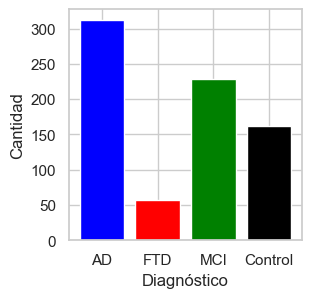

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los DataFrames
df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado = pd.read_excel(file_path_FTD)
df_MCI_filtrado = pd.read_excel(file_path_MCI)
df_PD_filtrado = pd.read_excel(file_path_PD)
df_control = xgb_model.X_test  # Grupo de control

# Crear un nuevo DataFrame con el conteo de elementos por diagnóstico
data = {
    'Diagnóstico': ['AD', 'FTD', 'MCI',  'Control'],
    'Conteo': [len(df_AD_filtrado), len(df_FTD_filtrado), len(df_MCI_filtrado), len(df_control)]
}

df_conteo = pd.DataFrame(data)

# Graficar el gráfico de barras
plt.figure(figsize=(3, 3))
plt.bar(df_conteo['Diagnóstico'], df_conteo['Conteo'], color=['blue', 'red', 'green', 'black'])

# Añadir etiquetas y título
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.title('')

# Mostrar el gráfico
plt.show()


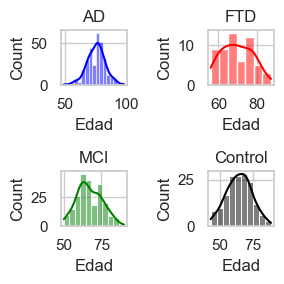

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los DataFrames
df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado = pd.read_excel(file_path_FTD)
df_MCI_filtrado = pd.read_excel(file_path_MCI)
df_control = xgb_model.X_test  # Grupo de control

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear un subplot para cada DataFrame (excluyendo PD)
fig, axes = plt.subplots(2, 2, figsize=(3, 3))

# Graficar la distribución de la edad para cada DataFrame
sns.histplot(df_AD_filtrado['Age'], ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('AD')
axes[0, 0].set_xlabel('Edad')

sns.histplot(df_FTD_filtrado['Age'], ax=axes[0, 1], kde=True, color='red')
axes[0, 1].set_title('FTD')
axes[0, 1].set_xlabel('Edad')

sns.histplot(df_MCI_filtrado['Age'], ax=axes[1, 0], kde=True, color='green')
axes[1, 0].set_title('MCI')
axes[1, 0].set_xlabel('Edad')

sns.histplot(xgb_model.y_test, ax=axes[1, 1], kde=True, color='black')
axes[1, 1].set_title('Control')
axes[1, 1].set_xlabel('Edad')

# Ajustar la disposición de los subplots
plt.tight_layout()
plt.show()


In [7]:
with open(f'{path}Opt_Model/opt_XGB_model_40A.pickle', 'rb') as file:
    opt_xgb_40A= pickle.load(file)

In [8]:
errores = opt_xgb_40A.cv_results_['mean_test_score'][:100]

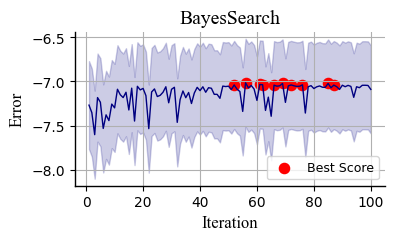

Top 1: Iteration 56, Score -7.014634330670039
Top 2: Iteration 69, Score -7.0224468789345185
Top 3: Iteration 85, Score -7.022498437563579
Top 4: Iteration 61, Score -7.034205054472655
Top 5: Iteration 62, Score -7.03698419411977
Top 6: Iteration 76, Score -7.037619199875072
Top 7: Iteration 52, Score -7.03915003709304
Top 8: Iteration 72, Score -7.039282055053955
Top 9: Iteration 87, Score -7.041247010934048
Top 10: Iteration 66, Score -7.04154234351256


In [9]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [10]:
best_params_xgb = xgb_model.best_hyper(opt_model=opt_xgb_40A, num_max=100)

In [ ]:
best_params_xgb

In [12]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(params_=best_params_xgb[0])

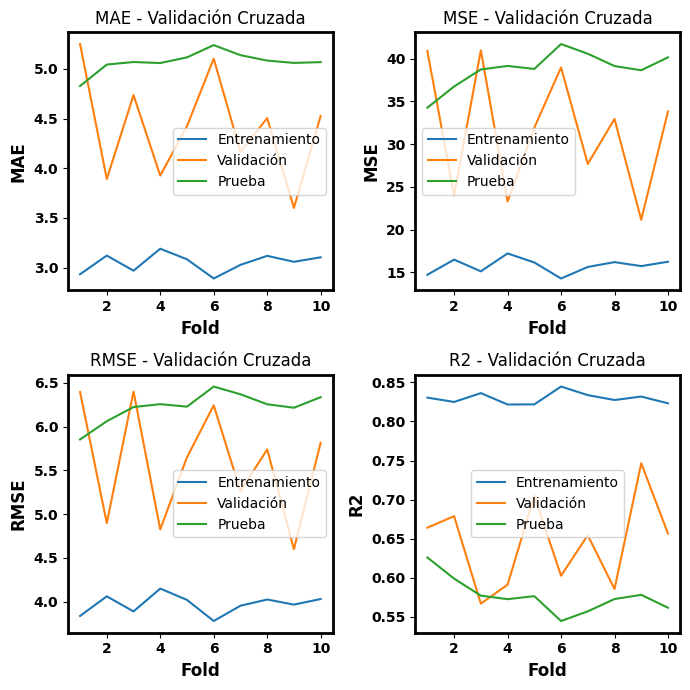

In [15]:
Plotter.plot_metricas_evaluacion(results)

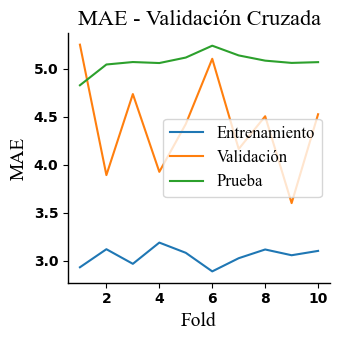

In [13]:
Plotter.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [14]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     275.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.22e-36
Time:                        14:36:52   Log-Likelihood:                -421.25
No. Observations:                 162   AIC:                             846.5
Df Residuals:                     160   BIC:                             852.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8198      1.760     20.349      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


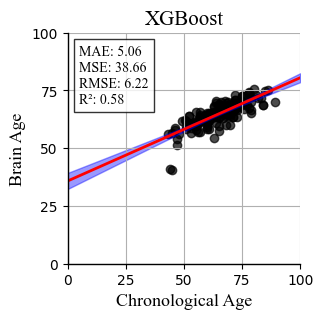

Error medio absoluto: 5.059243875366527
Error cuadrático medio: 38.65543481390099
Raíz del error cuadrático medio: 6.217349500703736
Coeficiente de determinación (R²): 0.5781939247001817


In [15]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [16]:
y_pred_test_ad=xgb_model.predicter_corrected_2(X_test= X_AD_scaled, y_test=y_AD)
y_pred_test_ftd=xgb_model.predicter_corrected_2(X_test= X_FTD_scaled, y_test=y_FTD)
y_pred_test_mci=xgb_model.predicter_corrected_2(X_test= X_MCI_scaled, y_test=y_MCI)


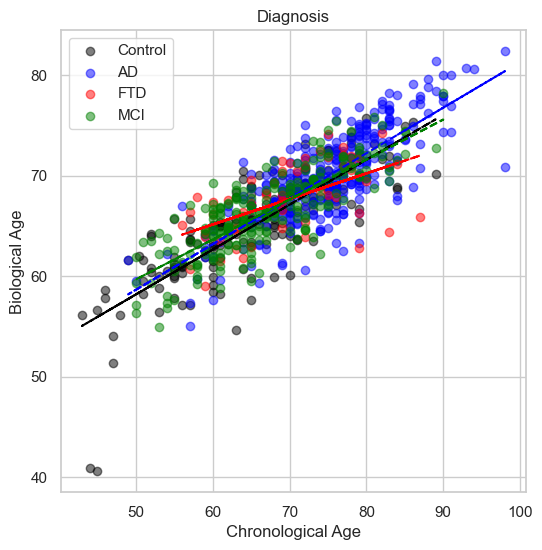

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green',)


# Añadir detalles
plt.xlabel('Chronological Age')
plt.ylabel('Biological Age')
plt.title('Diagnosis')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Mayores a 20 Años

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_name = 'dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
file_path_AD = f'{path}df_AD_filtrado.xlsx'
file_path_FTD = f'{path}df_FTD_filtrado.xlsx'
file_path_MCI = f'{path}df_MCI_filtrado.xlsx'
file_path_PD = f'{path}df_PD_filtrado.xlsx'

df = pd.read_excel(file_path)
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)

df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado=pd.read_excel(file_path_FTD)
df_MCI_filtrado=pd.read_excel(file_path_MCI)
df_PD_filtrado=pd.read_excel(file_path_PD)

X_CN = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
X_AD = df_AD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_FTD = df_FTD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_MCI = df_MCI_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_PD = df_PD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])

# Combina X_CN y X_AD
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI], axis=0).reset_index(drop=True)

# Inicializa y ajusta el MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_combined)

# Aplica la transformación a X_CN y X_AD
X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)

# Opcional: convierte los resultados escalados de nuevo a DataFrames si lo prefieres
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)

y = df_filtrado["Age"]
y_AD = df_AD_filtrado["Age"]
y_FTD = df_FTD_filtrado["Age"]
y_MCI = df_MCI_filtrado["Age"]



In [30]:
xgb_model = XGBoostRegressor()
xgb_model.set_data(X_CN_scaled,y,preprocess=False)


In [24]:
with open(f'{path}Opt_Model/opt_XGB_model_400iter.pickle', 'rb') as file:
    opt_xgb= pickle.load(file)

In [25]:
best_params_xgb = xgb_model.best_hyper(opt_model=opt_xgb, num_max=100)

In [31]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 10,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": False
            }

In [ ]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(params_=best_params_xgb[0])

In [33]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     836.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.20e-85
Time:                        15:41:05   Log-Likelihood:                -993.57
No. Observations:                 276   AIC:                             1991.
Df Residuals:                     274   BIC:                             1998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9608      1.368      8.744      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


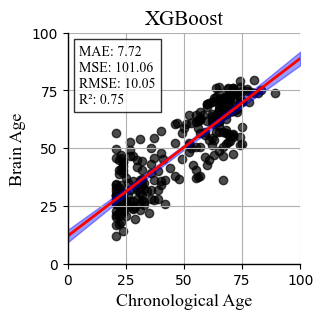

Error medio absoluto: 7.723095679810836
Error cuadrático medio: 101.0642055942063
Raíz del error cuadrático medio: 10.053069461324053
Coeficiente de determinación (R²): 0.7502782711878307


In [34]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [35]:
y_pred_test_ad=xgb_model.predicter_corrected_2(X_test= X_AD_scaled, y_test=y_AD)
y_pred_test_ftd=xgb_model.predicter_corrected_2(X_test= X_FTD_scaled, y_test=y_FTD)
y_pred_test_mci=xgb_model.predicter_corrected_2(X_test= X_MCI_scaled, y_test=y_MCI)


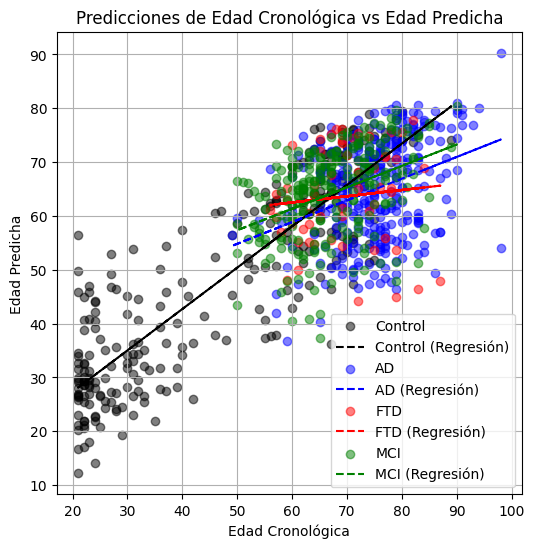

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color, label):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, label=f'{label} (Regresión)', linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black', label='Control')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue', label='AD')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red', label='FTD')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green', label='MCI')


# Añadir detalles
plt.xlabel('Edad Cronológica')
plt.ylabel('Edad Predicha')
plt.title('Predicciones de Edad Cronológica vs Edad Predicha')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [45]:
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)
X_CN = df_filtrado.drop(columns=["Unnamed: 0", "Age"])

X_CN_scaled = scaler.transform(X_CN)
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

y = df_filtrado["Age"]



In [46]:
xgb_model.set_data(X_CN_scaled,y,preprocess=False)

In [47]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     180.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           4.63e-28
Time:                        15:45:28   Log-Likelihood:                -553.73
No. Observations:                 162   AIC:                             1111.
Df Residuals:                     160   BIC:                             1118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4217      3.988      2.613      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


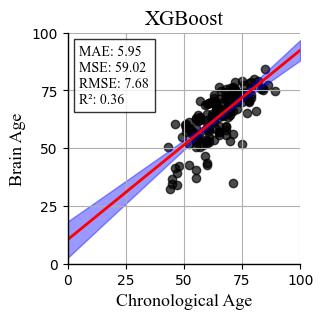

Error medio absoluto: 5.950806655370105
Error cuadrático medio: 59.01896912244261
Raíz del error cuadrático medio: 7.682380433332016
Coeficiente de determinación (R²): 0.3559881073999386


In [48]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [49]:
y_pred_test_ad=xgb_model.predicter_corrected_2(X_test= X_AD_scaled, y_test=y_AD)
y_pred_test_ftd=xgb_model.predicter_corrected_2(X_test= X_FTD_scaled, y_test=y_FTD)
y_pred_test_mci=xgb_model.predicter_corrected_2(X_test= X_MCI_scaled, y_test=y_MCI)


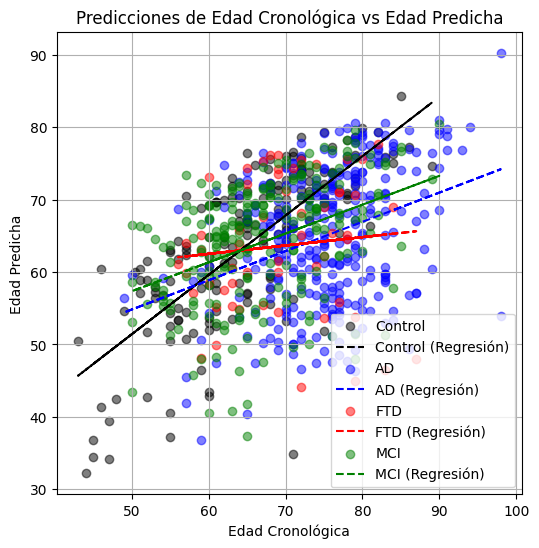

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color, label):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, label=f'{label} (Regresión)', linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black', label='Control')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue', label='AD')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red', label='FTD')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green', label='MCI')


# Añadir detalles
plt.xlabel('Edad Cronológica')
plt.ylabel('Edad Predicha')
plt.title('Predicciones de Edad Cronológica vs Edad Predicha')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Top 20

In [27]:
xgb_model = XGBoostRegressor()
xgb_model.set_data(X_CN_scaled,y, preprocess=False)

In [9]:
with open(f'{path}Opt_Model/opt_XGB_model_40A_top20.pickle', 'rb') as file:
    opt_xgb_40A_top20= pickle.load(file)

In [10]:
errores = opt_xgb_40A_top20.cv_results_['mean_test_score'][:100]

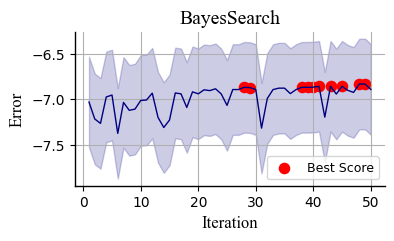

Top 1: Iteration 49, Score -6.831900166487083
Top 2: Iteration 48, Score -6.831900195830907
Top 3: Iteration 43, Score -6.856505193740894
Top 4: Iteration 45, Score -6.856857624848684
Top 5: Iteration 41, Score -6.8574269590928
Top 6: Iteration 40, Score -6.866131602892509
Top 7: Iteration 39, Score -6.867924723258386
Top 8: Iteration 28, Score -6.867924865484238
Top 9: Iteration 38, Score -6.867925187624418
Top 10: Iteration 29, Score -6.8710429588342326


In [18]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [19]:
best_params_xgb_top20 = xgb_model.best_hyper(opt_xgb_40A_top20)

In [ ]:
best_params_xgb_top20

In [21]:
with open(f'{path}Opt_Model_2/shap_summary_sorted_xgb.pickle', 'rb') as file:
    shap_summary_sorted= pickle.load(file)

In [23]:
top_20_features = [feature[0] for feature in shap_summary_sorted[:20]]

In [32]:
X_train_top20 = xgb_model.X_train[top_20_features]
X_test_top20 = xgb_model.X_test[top_20_features]  

In [30]:
X_AD_scaled_top20 = X_AD_scaled[top_20_features]
X_FTD_scaled_top20 = X_FTD_scaled[top_20_features]
X_MCI_scaled_top20 = X_MCI_scaled[top_20_features]

In [78]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 20,
                "eval_metric": "mae",
                "eval_set": [(X_CN_scaled[top_20_features], y)],
                "verbose": True
            }

In [62]:
xgb_model.fit_params_train = {}

In [79]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(X_train=X_train_top20,X_test=X_test_top20,params_=best_params_xgb_top20[0])

[0]	validation_0-mae:7.68206
[1]	validation_0-mae:7.64854
[2]	validation_0-mae:7.61837
[3]	validation_0-mae:7.58442
[4]	validation_0-mae:7.55159
[5]	validation_0-mae:7.52387
[6]	validation_0-mae:7.49347
[7]	validation_0-mae:7.46393
[8]	validation_0-mae:7.43348
[9]	validation_0-mae:7.40459
[10]	validation_0-mae:7.37401
[11]	validation_0-mae:7.34741
[12]	validation_0-mae:7.32368
[13]	validation_0-mae:7.29852
[14]	validation_0-mae:7.27268
[15]	validation_0-mae:7.24460
[16]	validation_0-mae:7.21691
[17]	validation_0-mae:7.19111
[18]	validation_0-mae:7.16685
[19]	validation_0-mae:7.13793
[20]	validation_0-mae:7.11126
[21]	validation_0-mae:7.08392
[22]	validation_0-mae:7.05553
[23]	validation_0-mae:7.02697
[24]	validation_0-mae:7.00589
[25]	validation_0-mae:6.97845
[26]	validation_0-mae:6.95635
[27]	validation_0-mae:6.93213


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-mae:6.90857
[29]	validation_0-mae:6.88207
[30]	validation_0-mae:6.86275
[31]	validation_0-mae:6.83752
[32]	validation_0-mae:6.81278
[33]	validation_0-mae:6.78615
[34]	validation_0-mae:6.76072
[35]	validation_0-mae:6.73426
[36]	validation_0-mae:6.70962
[37]	validation_0-mae:6.68370
[38]	validation_0-mae:6.65847
[39]	validation_0-mae:6.63631
[40]	validation_0-mae:6.61551
[41]	validation_0-mae:6.59145
[42]	validation_0-mae:6.56739
[43]	validation_0-mae:6.54410
[44]	validation_0-mae:6.52123
[45]	validation_0-mae:6.49830
[46]	validation_0-mae:6.47989
[47]	validation_0-mae:6.45773
[48]	validation_0-mae:6.43722
[49]	validation_0-mae:6.41703
[50]	validation_0-mae:6.39472
[51]	validation_0-mae:6.37964
[52]	validation_0-mae:6.35784
[53]	validation_0-mae:6.33448
[54]	validation_0-mae:6.31531
[55]	validation_0-mae:6.29508
[56]	validation_0-mae:6.27722
[57]	validation_0-mae:6.25738
[58]	validation_0-mae:6.23824
[59]	validation_0-mae:6.21779
[60]	validation_0-mae:6.19844
[61]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-mae:7.22614
[18]	validation_0-mae:7.20189
[19]	validation_0-mae:7.17333
[20]	validation_0-mae:7.15300
[21]	validation_0-mae:7.12549
[22]	validation_0-mae:7.09572
[23]	validation_0-mae:7.07158
[24]	validation_0-mae:7.04952
[25]	validation_0-mae:7.02113
[26]	validation_0-mae:6.99328
[27]	validation_0-mae:6.97406
[28]	validation_0-mae:6.94906
[29]	validation_0-mae:6.92896
[30]	validation_0-mae:6.90819
[31]	validation_0-mae:6.88557
[32]	validation_0-mae:6.86064
[33]	validation_0-mae:6.83770
[34]	validation_0-mae:6.81461
[35]	validation_0-mae:6.79412
[36]	validation_0-mae:6.77443
[37]	validation_0-mae:6.75126
[38]	validation_0-mae:6.72784
[39]	validation_0-mae:6.70628
[40]	validation_0-mae:6.68416
[41]	validation_0-mae:6.66126
[42]	validation_0-mae:6.64024
[43]	validation_0-mae:6.62131
[44]	validation_0-mae:6.60350
[45]	validation_0-mae:6.58727
[46]	validation_0-mae:6.56593
[47]	validation_0-mae:6.54698
[48]	validation_0-mae:6.53243
[49]	validation_0-mae:6.52001
[50]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-mae:7.04617
[26]	validation_0-mae:7.02240
[27]	validation_0-mae:7.00153
[28]	validation_0-mae:6.97747
[29]	validation_0-mae:6.95357
[30]	validation_0-mae:6.93289
[31]	validation_0-mae:6.91137
[32]	validation_0-mae:6.88813
[33]	validation_0-mae:6.86901
[34]	validation_0-mae:6.84922
[35]	validation_0-mae:6.83072
[36]	validation_0-mae:6.81191
[37]	validation_0-mae:6.79137
[38]	validation_0-mae:6.77186
[39]	validation_0-mae:6.75119
[40]	validation_0-mae:6.72912
[41]	validation_0-mae:6.70842
[42]	validation_0-mae:6.69128
[43]	validation_0-mae:6.67280
[44]	validation_0-mae:6.65615
[45]	validation_0-mae:6.63663
[46]	validation_0-mae:6.61478
[47]	validation_0-mae:6.59175
[48]	validation_0-mae:6.57362
[49]	validation_0-mae:6.55645
[50]	validation_0-mae:6.53650
[51]	validation_0-mae:6.51846
[52]	validation_0-mae:6.50057
[53]	validation_0-mae:6.48058
[54]	validation_0-mae:6.46188
[55]	validation_0-mae:6.44364
[56]	validation_0-mae:6.42576
[57]	validation_0-mae:6.40550
[58]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-mae:6.97419
[29]	validation_0-mae:6.95366
[30]	validation_0-mae:6.93190
[31]	validation_0-mae:6.90855
[32]	validation_0-mae:6.88430
[33]	validation_0-mae:6.86293
[34]	validation_0-mae:6.84204
[35]	validation_0-mae:6.82274
[36]	validation_0-mae:6.80400
[37]	validation_0-mae:6.78485
[38]	validation_0-mae:6.76419
[39]	validation_0-mae:6.74337
[40]	validation_0-mae:6.72059
[41]	validation_0-mae:6.70162
[42]	validation_0-mae:6.68164
[43]	validation_0-mae:6.66255
[44]	validation_0-mae:6.64399
[45]	validation_0-mae:6.62413
[46]	validation_0-mae:6.60128
[47]	validation_0-mae:6.58152
[48]	validation_0-mae:6.56328
[49]	validation_0-mae:6.54369
[50]	validation_0-mae:6.52489
[51]	validation_0-mae:6.50766
[52]	validation_0-mae:6.49095
[53]	validation_0-mae:6.47493
[54]	validation_0-mae:6.45676
[55]	validation_0-mae:6.43935
[56]	validation_0-mae:6.42209
[57]	validation_0-mae:6.40519
[58]	validation_0-mae:6.38754
[59]	validation_0-mae:6.37129
[60]	validation_0-mae:6.35456
[61]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-mae:7.09364
[25]	validation_0-mae:7.06731
[26]	validation_0-mae:7.04084
[27]	validation_0-mae:7.01781
[28]	validation_0-mae:6.99908
[29]	validation_0-mae:6.97765
[30]	validation_0-mae:6.95503
[31]	validation_0-mae:6.93234
[32]	validation_0-mae:6.90964
[33]	validation_0-mae:6.89068
[34]	validation_0-mae:6.86697
[35]	validation_0-mae:6.84638
[36]	validation_0-mae:6.82455
[37]	validation_0-mae:6.80083
[38]	validation_0-mae:6.77997
[39]	validation_0-mae:6.75779
[40]	validation_0-mae:6.74146
[41]	validation_0-mae:6.71946
[42]	validation_0-mae:6.69815
[43]	validation_0-mae:6.67736
[44]	validation_0-mae:6.65812
[45]	validation_0-mae:6.63556
[46]	validation_0-mae:6.61575
[47]	validation_0-mae:6.59332
[48]	validation_0-mae:6.57596
[49]	validation_0-mae:6.55828
[50]	validation_0-mae:6.53799
[51]	validation_0-mae:6.52234
[52]	validation_0-mae:6.50363
[53]	validation_0-mae:6.48537
[54]	validation_0-mae:6.46998
[55]	validation_0-mae:6.44829
[56]	validation_0-mae:6.43094
[57]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-mae:6.92714
[29]	validation_0-mae:6.90530
[30]	validation_0-mae:6.88399
[31]	validation_0-mae:6.85518
[32]	validation_0-mae:6.83199
[33]	validation_0-mae:6.80845
[34]	validation_0-mae:6.78142
[35]	validation_0-mae:6.75665
[36]	validation_0-mae:6.73250
[37]	validation_0-mae:6.71041
[38]	validation_0-mae:6.68919
[39]	validation_0-mae:6.66798
[40]	validation_0-mae:6.65042
[41]	validation_0-mae:6.62522
[42]	validation_0-mae:6.60080
[43]	validation_0-mae:6.58261
[44]	validation_0-mae:6.55742
[45]	validation_0-mae:6.53320
[46]	validation_0-mae:6.50837
[47]	validation_0-mae:6.48406
[48]	validation_0-mae:6.46541
[49]	validation_0-mae:6.44906
[50]	validation_0-mae:6.42368
[51]	validation_0-mae:6.40510
[52]	validation_0-mae:6.38321
[53]	validation_0-mae:6.36040
[54]	validation_0-mae:6.34149
[55]	validation_0-mae:6.31968
[56]	validation_0-mae:6.29993
[57]	validation_0-mae:6.28092
[58]	validation_0-mae:6.25758
[59]	validation_0-mae:6.23460
[60]	validation_0-mae:6.22260
[61]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-mae:6.94494
[28]	validation_0-mae:6.91736
[29]	validation_0-mae:6.89078
[30]	validation_0-mae:6.86885
[31]	validation_0-mae:6.84190
[32]	validation_0-mae:6.81821
[33]	validation_0-mae:6.79234
[34]	validation_0-mae:6.76499
[35]	validation_0-mae:6.74165
[36]	validation_0-mae:6.71702
[37]	validation_0-mae:6.69391
[38]	validation_0-mae:6.66970
[39]	validation_0-mae:6.64907
[40]	validation_0-mae:6.63019
[41]	validation_0-mae:6.60771
[42]	validation_0-mae:6.58296
[43]	validation_0-mae:6.56490
[44]	validation_0-mae:6.54258
[45]	validation_0-mae:6.51891
[46]	validation_0-mae:6.49534
[47]	validation_0-mae:6.47153
[48]	validation_0-mae:6.45172
[49]	validation_0-mae:6.43342
[50]	validation_0-mae:6.41220
[51]	validation_0-mae:6.39432
[52]	validation_0-mae:6.37819
[53]	validation_0-mae:6.35937
[54]	validation_0-mae:6.33790
[55]	validation_0-mae:6.32218
[56]	validation_0-mae:6.30529
[57]	validation_0-mae:6.28571
[58]	validation_0-mae:6.26338
[59]	validation_0-mae:6.24237
[60]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-mae:7.19864
[22]	validation_0-mae:7.17360
[23]	validation_0-mae:7.15128
[24]	validation_0-mae:7.13083
[25]	validation_0-mae:7.10940
[26]	validation_0-mae:7.08609
[27]	validation_0-mae:7.06275
[28]	validation_0-mae:7.04405
[29]	validation_0-mae:7.02521
[30]	validation_0-mae:7.00474
[31]	validation_0-mae:6.98566
[32]	validation_0-mae:6.96568
[33]	validation_0-mae:6.94869
[34]	validation_0-mae:6.92899
[35]	validation_0-mae:6.90781
[36]	validation_0-mae:6.88815
[37]	validation_0-mae:6.86960
[38]	validation_0-mae:6.85032
[39]	validation_0-mae:6.82860
[40]	validation_0-mae:6.80866
[41]	validation_0-mae:6.78999
[42]	validation_0-mae:6.77101
[43]	validation_0-mae:6.75064
[44]	validation_0-mae:6.73139
[45]	validation_0-mae:6.71503
[46]	validation_0-mae:6.69986
[47]	validation_0-mae:6.68341
[48]	validation_0-mae:6.66460
[49]	validation_0-mae:6.64740
[50]	validation_0-mae:6.63504
[51]	validation_0-mae:6.61875
[52]	validation_0-mae:6.60140
[53]	validation_0-mae:6.58176
[54]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-mae:7.03170
[28]	validation_0-mae:7.00737
[29]	validation_0-mae:6.99149
[30]	validation_0-mae:6.97106
[31]	validation_0-mae:6.94678
[32]	validation_0-mae:6.92176
[33]	validation_0-mae:6.89961
[34]	validation_0-mae:6.87666
[35]	validation_0-mae:6.85202
[36]	validation_0-mae:6.82489
[37]	validation_0-mae:6.80249
[38]	validation_0-mae:6.78259
[39]	validation_0-mae:6.76387
[40]	validation_0-mae:6.74157
[41]	validation_0-mae:6.72329
[42]	validation_0-mae:6.70382
[43]	validation_0-mae:6.68286
[44]	validation_0-mae:6.66304
[45]	validation_0-mae:6.64140
[46]	validation_0-mae:6.62079
[47]	validation_0-mae:6.60261
[48]	validation_0-mae:6.58642
[49]	validation_0-mae:6.56922
[50]	validation_0-mae:6.55648
[51]	validation_0-mae:6.54022
[52]	validation_0-mae:6.52040
[53]	validation_0-mae:6.50171
[54]	validation_0-mae:6.48282
[55]	validation_0-mae:6.46697
[56]	validation_0-mae:6.44962
[57]	validation_0-mae:6.42970
[58]	validation_0-mae:6.41247
[59]	validation_0-mae:6.39131
[60]	valid

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-mae:6.97661
[29]	validation_0-mae:6.95349
[30]	validation_0-mae:6.93315
[31]	validation_0-mae:6.90985
[32]	validation_0-mae:6.88883
[33]	validation_0-mae:6.86579
[34]	validation_0-mae:6.84516
[35]	validation_0-mae:6.82120
[36]	validation_0-mae:6.79994
[37]	validation_0-mae:6.77698
[38]	validation_0-mae:6.75549
[39]	validation_0-mae:6.73552
[40]	validation_0-mae:6.71703
[41]	validation_0-mae:6.69256
[42]	validation_0-mae:6.67188
[43]	validation_0-mae:6.65193
[44]	validation_0-mae:6.63155
[45]	validation_0-mae:6.61129
[46]	validation_0-mae:6.58704
[47]	validation_0-mae:6.56432
[48]	validation_0-mae:6.54871
[49]	validation_0-mae:6.53009
[50]	validation_0-mae:6.50407
[51]	validation_0-mae:6.48673
[52]	validation_0-mae:6.46617
[53]	validation_0-mae:6.44080
[54]	validation_0-mae:6.42187
[55]	validation_0-mae:6.40116
[56]	validation_0-mae:6.38197
[57]	validation_0-mae:6.36241
[58]	validation_0-mae:6.34548
[59]	validation_0-mae:6.32820
[60]	validation_0-mae:6.31368
[61]	valid

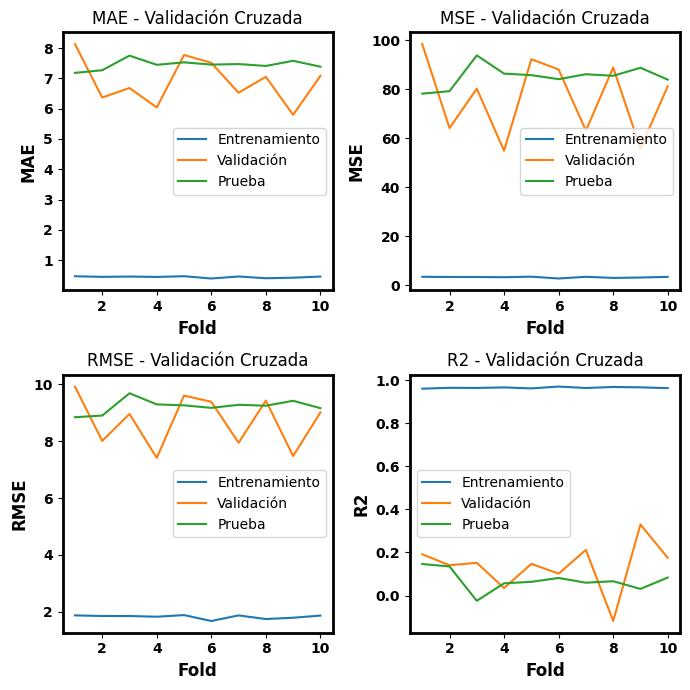

In [71]:
Plotter.plot_metricas_evaluacion(results)

In [72]:
y_pred=xgb_model.predicter_corrected_2(X_test= X_test_top20)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     21.76
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           6.48e-06
Time:                        13:18:58   Log-Likelihood:                -514.12
No. Observations:                 162   AIC:                             1032.
Df Residuals:                     160   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2263      3.123     16.083      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


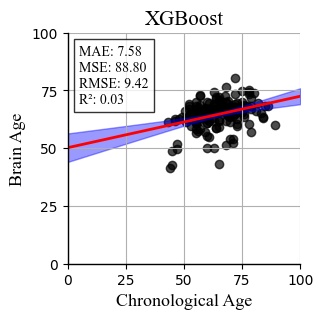

Error medio absoluto: 7.5829739179650435
Error cuadrático medio: 88.79507081498068
Raíz del error cuadrático medio: 9.423113647567915
Coeficiente de determinación (R²): 0.03107284896023499


In [73]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [74]:
y_pred_test_ad=xgb_model.predicter_corrected_2(X_test= X_AD_scaled_top20, y_test=y_AD)
y_pred_test_ftd=xgb_model.predicter_corrected_2(X_test= X_FTD_scaled_top20, y_test=y_FTD)
y_pred_test_mci=xgb_model.predicter_corrected_2(X_test= X_MCI_scaled_top20, y_test=y_MCI)


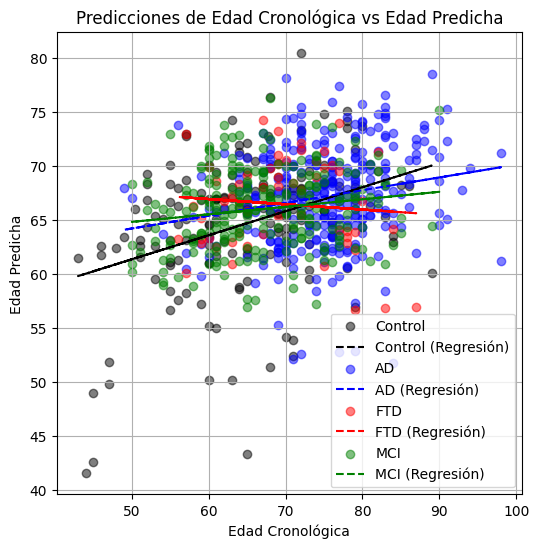

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color, label):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, label=f'{label} (Regresión)', linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black', label='Control')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue', label='AD')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red', label='FTD')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green', label='MCI')


# Añadir detalles
plt.xlabel('Edad Cronológica')
plt.ylabel('Edad Predicha')
plt.title('Predicciones de Edad Cronológica vs Edad Predicha')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
